In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
X = np.arange(-1.0,1.1,0.1)
Y = np.arange(-1.0,1.1,0.1)

input_data = []
correct_data = []
for x in X:
    for y in Y:
        input_data.append([x,y])
        if y < np.sin(np.pi*x):# y값이 sin곡선 아래에 있을 경우
            correct_data.append([0,1])
        else: # y값이 sin곡선 위에 있을 경우
            correct_data.append([1,0])

n_data = len(correct_data)

input_data = np.array(input_data)
correct_data = np.array(correct_data)

n_in = 2
n_mid = 6
n_out = 2

wb_width = 0.01
eta = 0.1
epoch = 101
interval = 10

class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        # wb_width = 0.01 가중치와 편향 설정을 위한 정규분포의 표준편차
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u)) #시그모이드 함수
        
    def backward(self, grad_y):
        delta = grad_y * (1-self.y)*(self.y)
        self.grad_w = np.dot(self.x.T,delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta*self.grad_w
        self.b -= eta*self.grad_b


        

In [16]:
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        # wb_width = 0.01 가중치와 편향 설정을 위한 정규분포의 표준편차
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u)/np.sum(np.exp(u), axis=1, keepdims=True)
        # 소프트맥스 함수
        # 배치사이즈 X1 형태의 행렬을 유지하기 위해 keepdims=True 사용
        
        
    def backward(self, t):
        delta = self.y - t
        self.grad_w = np.dot(self.x.T,delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta*self.grad_w
        self.b -= eta*self.grad_b
        

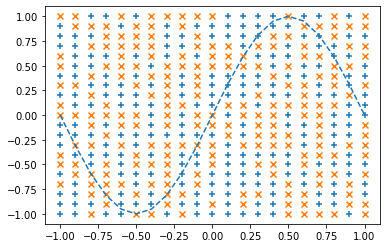

 Epoch:0/101
 Error:-0.7316620950617464


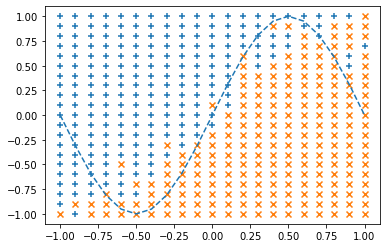

 Epoch:10/101
 Error:-0.3141522000323281


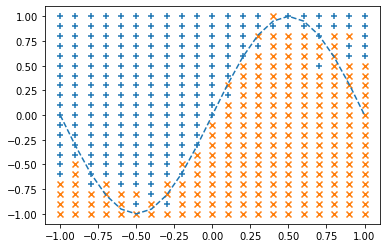

 Epoch:20/101
 Error:-0.22621531562865024


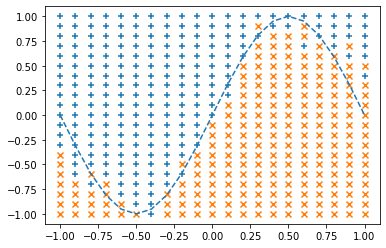

 Epoch:30/101
 Error:-0.18076733278131343


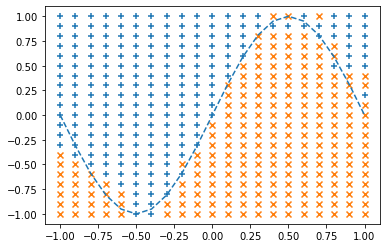

 Epoch:40/101
 Error:-0.14305225079232986


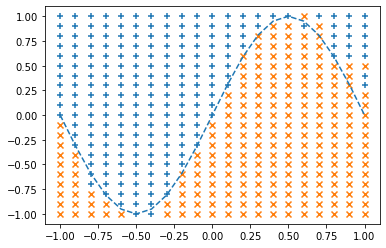

 Epoch:50/101
 Error:-0.1133930898703769


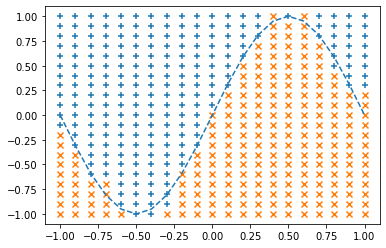

 Epoch:60/101
 Error:-0.09959025001710042


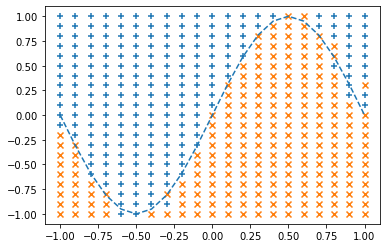

 Epoch:70/101
 Error:-0.08323358240193562


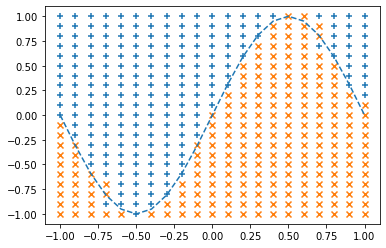

 Epoch:80/101
 Error:-0.07499129344992506


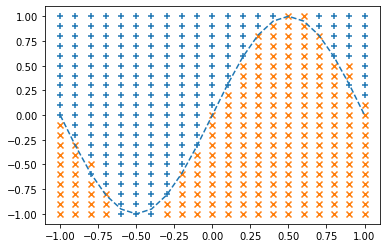

 Epoch:90/101
 Error:-0.07170623008898276


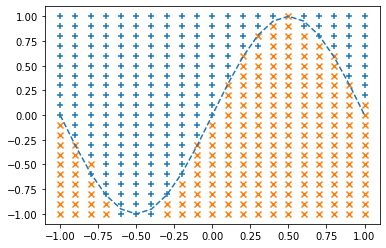

 Epoch:100/101
 Error:-0.06687459616093736


In [25]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

sin_data = np.sin(np.pi * X)

for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
    
    for idx in index_random:
        x = input_data[idx]
        t = correct_data[idx]
        
        middle_layer.forward(x.reshape(1,2))
        output_layer.forward(middle_layer.y)
        
        output_layer.backward(t.reshape(1,2))
        middle_layer.backward(output_layer.grad_x)
        
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval==0:
            y = output_layer.y.reshape(-1)
            total_error += np.sum(t*np.log(y+1e-7))
            
            if y[0]>y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
                
            else:
                x_2.append(x[0])
                y_2.append(x[1])
                
    if i % interval==0:
        plt.plot(X, sin_data, linestyle='dashed')
        plt.scatter(x_1, y_1, marker='+')
        plt.scatter(x_2, y_2, marker='x')
        plt.show()

        print(' Epoch:' + str(i)+'/'+str(epoch) + '\n',\
              'Error:' + str(total_error/n_data))
        